# Лабораторная 1
### Евдокимов Александр, группа 7, ММАД, вариант 21

1.	Разработать алгоритм моделирования заданной дискретной случайной величины и программно его реализовать.

$$
P\{\xi = k\} = \frac{(k + 1)(k + 2)(k + 3)}{6} \, p^4 (1 - p)^k, \quad k = 0, 1, \dots
$$

Случайная величина $\xi$ имеет **отрицательное биномиальное распределение** *$$\overline{B_i}(r=4, p)$$*

Отрицательное биномиальное распределение описывает число неудачных попыток, предшествующих r-ому успеху, в схеме независимых испытаний, при условии, что вероятность успеха в каждом испытании равна p. 

Для моделирования отрицательного биномиального распределения можно воспользоваться следующей теоремой.

**Теорема.** Если  $\xi_1,...,\xi_r$ - независимые с.в., имеющие геометрическое распределение *G(p)*, тогда с.в. $\sum^{r}_{j=1} {\xi_j}$  имеет отрицательное биномиальное распределение  *$\overline{B_i}(r, p)$*.

Таким образом, алгоритм моделирования с.в. $\xi$ будет выглядеть следующим образом.

Шаг 1. Моделирование $\xi_1,...,\xi_r$ имеющих геометрическое распределение *G(p)*.

Шаг 2. Вычисление $\xi = \xi_1 + ... + \xi_r$


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import chi2

Для генерации случайных величин $\xi_1, ..., \xi_r$, имеющих геометрическое распределение, воспользуемся формулой:

$$\xi =\left\lfloor{ \frac{\ln{\alpha}}{\ln{1-p}} }\right\rfloor

In [46]:
def geometric(p):
    a = np.random.rand()
    k = int(math.log(a)/math.log(1-p))
    return k

def neg_binomial(p, r = 4):
    return sum(geometric(p) for _ in range(r))

2. ​Провести тестовую проверку созданного генератора:

• получить оценку математического ожидания генерируемой случайной величины и сравнить ее с математическим ожиданием заданной;

• получить оценку дисперсии генерируемой случайной величины и сравнить ее с дисперсией заданной величины;

• проверить гипотезу о соответствии генерируемой случайной величины заданному распределению по критерию $\chi^2$;

• построить графики заданной функции распределения случайной величины и функции распределения, полученной по сгенерированной выборке.

In [47]:
def count_emp_mean(samples):
    return sum(samples)/len(samples)

def count_theor_mean(r, p):
    return r*(1-p)/p

def count_emp_var(samples):
    mean = count_emp_mean(samples)
    return sum((x - mean)**2 for x in samples)/len(samples)

def count_theor_var(r, p):
    return r*(1-p)/p**2

In [48]:
n = 1000
p = 0.5
r = 4

samples = [neg_binomial(p) for _ in range(n)]

print("Оценка математического ожидания:", count_emp_mean(samples))
print("Теоретическое математическое ожидание:", count_theor_mean(r, p), "\n")
print("Оценка дисперсии:", count_emp_var(samples))
print("Теоретическая дисперсия:", count_theor_var(r, p))

Оценка математического ожидания: 4.098
Теоретическое математическое ожидание: 4.0 

Оценка дисперсии: 8.340396
Теоретическая дисперсия: 8.0


Проверим гипотезу, используя критерия $\chi^2$:

$$H_1: \quad \text{выборка имеет распределение} \quad \overline{B_i}(r, p) $$

Альтернатива:

$$H_1: \quad \text{распределение отличается от } \quad \overline{B_i}(r, p)$$

In [ ]:

def distribution(p,k):
    return ((k+1)*(k+2)*(k+3)*(p**4)*(1-p)**k)/6

def count_freq(samples):
    """Возвращает пару (список частот для каждого k от 0 до k_max, k_max), где k_max - количество категорий."""
    k_max = max(samples)

    freq = {k: 0 for k in range(k_max + 1)}
    for s in samples:
        freq[s]+=1
    return freq, k_max

freq,k_max = count_freq(samples)

obs = [freq.get(k,0) for k in range(k_max + 1)]
exp = [n * distribution(p, k) for k in range(k_max + 1)]

#Обьединяем частоты из хвоста, если они меньше 5, чтобы удовлетворить условия для применения критерия хи-квадрат
while (exp[-1] < 5):
    exp[-2]+=exp[-1]
    obs[-2]+=obs[-1]
    exp.pop()
    obs.pop()

chi2_stat = sum(((o - e)**2)/e for o, e in zip(obs, exp))
df = len(obs) - 1
alpha = 0.05
chi2_crit = chi2.ppf(1 - alpha, df)
p_value = chi2.cdf(chi2_stat, df)

print("Хи-квадрат эмпирическое значение:", chi2_stat)
print("Хи-квадрат критическое значение:", chi2_crit)

if chi2_stat > float(chi2_crit):
    print("Гипотеза отвергается")
else:
    print("Гипотеза не отвергается")

print("Количество степеней свобод:", df)
print("P-value", p_value)






Хи-квадрат эмпирическое значение: 12.22712423345065
Хи-квадрат критическое значение: 23.68479130484058
Гипотеза не отвергается
Количество степеней свобод: 14
P-value 0.4119314502824452


$$\chi^2_{набл} \le \chi^2_{крит}$$

$\text{Следовательно, гипотеза не отвергается, наша случайная величина соответствует распределению по критерию }\chi^2$

Теперь построим графики заданной функции распределения случайной величины и функции распределения, полученной по сгенерированной выборке.

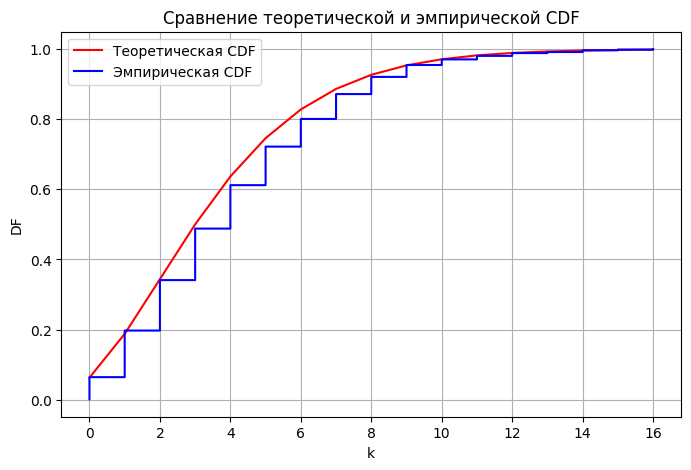

In [57]:
df_theoretical = []
cumsum = 0
for k in range(k_max+1):
    cumsum += distribution(p, k)
    df_theoretical.append(cumsum)

k_values = list(range(k_max+1))

sample_sorted = sorted(samples)
n = len(sample_sorted)

df_empirical = []
for i in range(n):
    df_empirical.append((i+1)/n)

plt.figure(figsize=(8,5))

plt.plot(k_values, df_theoretical, color='red', label='Теоретическая CDF')

plt.step(sample_sorted, df_empirical, where='post', color='blue', label='Эмпирическая CDF')

plt.xlabel('k')
plt.ylabel('DF')
plt.title('Сравнение теоретической и эмпирической CDF')
plt.legend()
plt.grid(True)
plt.show()